GRADIENT BOOSTING MACHINE MODEL
> 
A random sample of 5000 rows or compounds are selected from the inactive class and combined will all for model building

Importing Libraries and Data

In [6]:
# the big three
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# training algorithms
from sklearn.ensemble import GradientBoostingClassifier

# resampling algorithms
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# importing other libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

# importing metrics 
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, roc_curve, auc, balanced_accuracy_score

In [8]:
# read dataset into dataframe
df = pd.read_csv("../../../data/final.csv")
df.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,Activity
0,2,0,0,1,4,0,0,0,0,0,...,0,1,0,0,0,5.45943,-0.367670,0.363636,4.29650,0
1,1,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,5.08746,-0.772128,0.240000,2.31134,0
2,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.70044,-0.295978,0.300000,1.67610,0
3,2,0,0,1,3,0,0,0,0,0,...,0,1,1,0,0,5.49185,-0.357977,0.352941,2.63932,0
4,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.64386,-0.274183,0.315789,1.41996,0


In [9]:
# checking dimension of dataset
df.shape

(195244, 778)

In [10]:
# checking distribution of actives and inactives in dataset
df.Activity.value_counts()

0    194888
1       356
Name: Activity, dtype: int64

In [11]:
# creating new dataframes for active class and inactive class
df_0 = df.query("Activity == 0")
df_1 = df.query("Activity == 1")
len(df_0), len(df_1)

(194888, 356)

In [12]:
# randomly selecting 5000 active compounds from the inactive data
df_0 = df_0.sample(5000, random_state=56)
df_0.head(5)

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,Activity
14815,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.52356,-0.864904,0.333333,3.134230,0
173593,0,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,4.85798,-0.686336,0.000000,1.622290,0
37375,2,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,5.42626,-0.349615,0.342857,1.521120,0
170203,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.24793,0.002651,0.000000,0.343511,0
128828,1,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,4.80735,-0.656633,0.260870,2.025720,0


In [13]:
# combining active data to inactive data to form complete dataframe for model training and testing
df = pd.concat([df_0, df_1], ignore_index=True)
df

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,Activity
0,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.52356,-0.864904,0.333333,3.134230,0
1,0,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,4.85798,-0.686336,0.000000,1.622290,0
2,2,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,5.42626,-0.349615,0.342857,1.521120,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.24793,0.002651,0.000000,0.343511,0
4,1,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,4.80735,-0.656633,0.260870,2.025720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.24800,-0.798000,0.414000,3.011000,1
5352,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.20900,-0.790000,0.429000,2.788000,1
5353,1,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,4.90700,-0.717000,0.240000,3.179000,1
5354,3,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,5.55500,-0.767000,0.514000,4.465000,1


There are 5356 rows which is equal to 5000 and 356 actives. The dataset is still imblanced however this will be catered for at the data level using SMOTE

In [14]:
# divide dataframe into features, X and target y
X = df.drop(['Activity'],axis=1)
y = df['Activity']

# checking class distribution
print(y.value_counts())

0    5000
1     356
Name: Activity, dtype: int64


Dividing into train and test dataset

In [15]:
# dividing datasets into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# checking dimensions of train and test dataset
print("The training and test data have the following dimensions:\n{}{}".format(X_train.shape, X_test.shape))

# checking class distribution of train dataset
print("The class distribution of the train data:\n{}".format(y_train.value_counts()))

The training and test data have the following dimensions:
(4284, 777)(1072, 777)
The class distribution of the train data:
0    4000
1     284
Name: Activity, dtype: int64


Handling data for prediction
> 
In this section, the number of rows in the data for prediction is reduced to equal the number of rows of data that was used in the training

In [16]:
# reading the prediction dataset

df_pred = pd.read_csv("../../../data/new.csv")
df_pred.shape

(36711, 780)

In [17]:
# Removing columns not needed for training 
df_pred.drop(['ReadIn_ID', 'USER_ID_2'], axis = 1, inplace = True)

In [18]:
# Making the ID the index
df_pred = df_pred.set_index('USER_ID')
df_pred.head(5)

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
USER_ID,,,,,,,,,,,,,,,,,,,,,
M652-0486,1,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,0,5.42626,-0.648642,0.181818,0.498807
L258-0120,2,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,5.35755,-0.726331,0.375000,2.810180
L834-0670,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,0,5.28540,-0.696023,0.400000,2.897260
L258-0113,2,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,5.35755,-0.726331,0.375000,2.810180
L834-0614,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,0,5.28540,-0.696023,0.400000,3.010430


This is done to help us identify the compounds that are active after prediction (screening) with models

In [19]:
# checking dimension of dataset
X_train.shape, df_pred.shape

((4284, 777), (36711, 777))

REMOVING LOW VARIANCE FEATURES
> 
The variance threshold function will remove columns that dont meet a certain threshold. This is done to improve model performance

In [20]:
vt = VarianceThreshold(threshold=(.8 * (1 - .8)))

# Fit
_ = vt.fit(X_train)

# Get the mask
mask = vt.get_support()

# Subset the DataFrame
X_train = X_train.loc[:, mask]
X_test = X_test.loc[:, mask]

# Subset the dataset for predictions
df_p = df_pred.loc[:, mask]

In [21]:
X_train.shape, X_test.shape, df_pred.shape, df_p.shape

((4284, 354), (1072, 354), (36711, 777), (36711, 354))

The number of rows in the dataset remain the same however the number of columns have reduced

GRADIENT BOOSTING CLASSIFIER MODEL TRAINING
> 
For this section, the model is trained on either unsampled data or resampled data.

RESAMPLING USING SMOTE
> 
The dataset is resampled using SMOTE to obtain a active:inactive ratio of 1:1
> 
**THIS STEP SHOULD BE SKIPPED IF NO RESAMPLING WILL BE DONE**

OVERSMAPLING WITH SMOTE

In [22]:
over = SMOTE(sampling_strategy=1, random_state=9)
X_train, y_train = over.fit_resample(X_train, y_train)

# checking class distribution on resampled dataset
print(y_train.value_counts())

0    4000
1    4000
Name: Activity, dtype: int64


The dataset is now balanced. 

TRAINING MODELS

In [23]:
# creating model object
clf = GradientBoostingClassifier(random_state=0)

# training model
clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

PREDICTIONS

In [24]:
# predicting on train dataset
train_predictions = clf.predict(X_train)    

# predicting on test dataset
test_predictions = clf.predict(X_test)

If the performance of the model on the training dataset is significantly better than the performance on the test dataset, then the model may have overfit the training dataset.

CHECKING METRICS
> 
The metrics will be checked for both the training data and the tes dataset
>
For the confusion matrix: <br>
> 
True Negative (Top-Left Quadrant)<br>
False Positive (Top-Right Quadrant)<br>
False Negative (Bottom-Left Quadrant)<br>
True Positive (Bottom-Right Quadrant)<br>

TRAINING DATA

Accuracy Score:  0.983125
Balanced Accuracy:  0.983125
Precision Score:  0.9856747926614727
Recall Score:  0.9805
F1 Score:  0.9830805865396667
MCC:  0.9662633164080883
AUROC:  0.9986325625


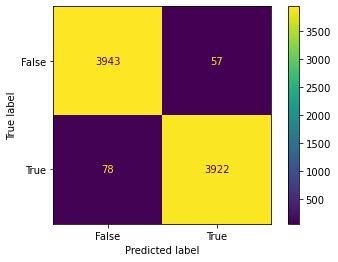

In [25]:
accuracy_test = accuracy_score(y_train, train_predictions)
balanced_accuracy_train = balanced_accuracy_score(y_train, train_predictions)
precision = precision_score(y_train, train_predictions)
recall = recall_score(y_train, train_predictions)
f1 = f1_score(y_train, train_predictions)
mcc = matthews_corrcoef(y_train, train_predictions)


pred_prob = clf.predict_proba(X_train)[:,1]
auroc = roc_auc_score(y_train, pred_prob)                   

print("Accuracy Score: ", accuracy_test)
print("Balanced Accuracy: ", balanced_accuracy_train)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("F1 Score: ", f1)
print("MCC: ", mcc)
print("AUROC: ", auroc)

cm = confusion_matrix(y_train, train_predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

TEST DATA

Accuracy Score:  0.9682835820895522
Balanced Accuracy:  0.8605555555555555
Precision Score:  0.7794117647058824
Recall Score:  0.7361111111111112
F1 Score:  0.7571428571428572
MCC:  0.740537614607836
AUROC:  0.9596666666666667


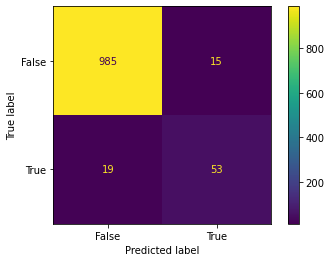

In [26]:
accuracy_test = accuracy_score(y_test, test_predictions)
balanced_accuracy_test = balanced_accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)

pred_prob = clf.predict_proba(X_test)
auroc = roc_auc_score(y_test, pred_prob[:,1])

print("Accuracy Score: ", accuracy_test)
print("Balanced Accuracy: ", balanced_accuracy_test)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("F1 Score: ", f1)
print("MCC: ", mcc)
print("AUROC: ", auroc)

cm = confusion_matrix(y_test, test_predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

PLOTTING ROC CURVE FOR TEST DATA

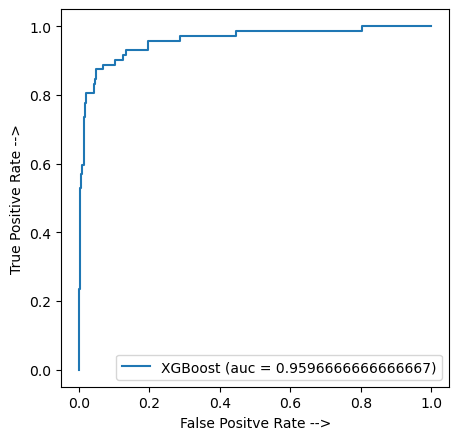

In [27]:
fpr, tpr, threshold = roc_curve(y_test, pred_prob[:, 1])
auc_score = auc(fpr, tpr)

plt.figure(figsize = (5, 5), dpi = 100)
plt.plot(fpr, tpr, label = 'XGBoost (auc = {})' .format(auc_score))
plt.xlabel('False Positve Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

Is the curve consistent to the auroc value obtained previously

Performing predictions on new datasets to find new actives

In [33]:
# checking predictions and probabilities of predictions
pred = clf.predict(df_p)
pred_prob = clf.predict_proba(df_p)

In [35]:
# check if there is any prediction of 1 (active)
pred.sum()

21

In [36]:
# creating a dataframe of predictions and probabilities
df_pred['Predictions'] = pred
df_pred['Probabilities'] = pred_prob[:, 1]
df_pred.head()

,USER_ID,D001,D002,D003,D004,D005,D006,D007,D008,D009,...,D770,D771,D772,D773,D774,D775,D776,D777,Predictions,Probabilities
0,M652-0486,1,0,0,1,4,0,0,0,0,...,0,0,0,0,5.42626,-0.648642,0.181818,0.498807,0,0.018752
1,L258-0120,2,0,0,0,3,0,0,0,0,...,0,0,0,0,5.35755,-0.726331,0.375000,2.810180,0,0.006885
2,L834-0670,2,0,0,1,3,0,0,0,0,...,0,0,0,0,5.28540,-0.696023,0.400000,2.897260,0,0.247269
3,L258-0113,2,0,0,0,3,0,0,0,0,...,0,0,0,0,5.35755,-0.726331,0.375000,2.810180,0,0.006885
4,L834-0614,2,0,0,1,3,0,0,0,0,...,0,0,0,0,5.28540,-0.696023,0.400000,3.010430,0,0.161214


In [38]:
# writing active compounds with 1 as predictiions and their probabilities to a csv file
df_pred[df_pred['Predictions'] == 1].to_csv('data/predicted_actives_gbm.csv', index = False)
df_pred[df_pred['Predictions'] == 1]


,USER_ID,D001,D002,D003,D004,D005,D006,D007,D008,D009,...,D770,D771,D772,D773,D774,D775,D776,D777,Predictions,Probabilities
261,D488-0121,3,0,0,1,4,0,0,0,0,...,0,0,0,0,5.72792,-0.822058,0.461538,3.66371,1,0.594959
274,D488-0114,2,0,0,1,4,0,0,0,0,...,0,0,0,0,5.70044,-0.816815,0.315789,3.33826,1,0.659974
280,D305-0402,3,0,0,1,4,0,0,0,0,...,0,0,0,0,5.61471,-0.816815,0.473684,4.08437,1,0.527001
3491,F069-0210,2,0,0,0,3,0,0,0,0,...,0,0,0,0,5.28540,-0.706842,0.400000,2.58441,1,0.521137
7409,D420-2730,2,0,0,1,4,0,0,0,0,...,0,0,0,0,5.49185,-0.767101,0.342857,3.00023,1,0.517550
7415,D420-1684,2,0,0,1,4,0,0,0,0,...,0,0,0,0,5.42626,-0.785198,0.363636,3.54823,1,0.609670
12139,Z341-0197,1,0,0,2,3,0,0,0,0,...,0,0,0,0,5.61471,-0.744309,0.150000,1.45307,1,0.585348
19334,D488-0310,2,0,0,1,4,0,0,0,0,...,0,0,0,0,5.72792,-0.793711,0.307692,2.84712,1,0.583937
19504,D420-1970,2,0,0,1,4,0,0,0,0,...,0,0,0,0,5.45943,-0.792361,0.352941,3.49136,1,0.624018
22469,S343-1027,2,0,0,2,3,0,0,0,0,...,0,0,0,0,5.49185,-0.785198,0.363636,3.20774,1,0.575735


Saving model to joblib file

In [ ]:
import joblib

In [ ]:
joblib.dump(clf, 'saved_models/gbm_5_joblib')

Loading model

In [ ]:
mj = joblib.load('saved_models/gbm_5_joblib')

In [ ]:
# predicting with loaded model
d = mj.predict(df_p)
np.bincount(d)